# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [1]:
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [11]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')
#boros

In [14]:
boros

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330466.075042,1.623827e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,741185.900596,1.937597e+09,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,897040.298576,3.045168e+09,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,358408.460709,6.364467e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464400.198868,1.186973e+09,(POLYGON ((1012821.805786133 229228.2645874023...


Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [3]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)


In [4]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,11,22,,304,,2019-02-28 11:08:59 AM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33
1,,10,49,,359,,2019-02-28 11:09:23 AM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64
2,,13,32,,377,,2019-02-28 11:09:37 AM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45
3,,10,25,,402,,2019-02-28 11:10:42 AM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39
4,,6,12,,3255,,2019-02-28 11:07:31 AM,40.750585,,-73.994685,,8 Ave & W 31 St,,8 Ave & W 31 St,1,In Service,False,19


In [5]:
# there is one row for each bike station.  How many stations are there? 
len(df)

814

In [7]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up
#GeoSeries=()
s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

array([-74.0836394 ,  40.65539977, -73.9077436 ,  40.81439444])

In [13]:
df

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry
0,,11,22,,304,,2019-02-28 11:08:59 AM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33,POINT (980474.5127561709 195993.6964498408)
1,,10,49,,359,,2019-02-28 11:09:23 AM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64,POINT (991179.9038325883 214381.943780388)
2,,13,32,,377,,2019-02-28 11:09:37 AM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45,POINT (982679.8907825906 202480.2214391762)
3,,10,25,,402,,2019-02-28 11:10:42 AM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39,POINT (987145.5291465931 209003.7784183958)
4,,6,12,,3255,,2019-02-28 11:07:31 AM,40.750585,,-73.994685,,8 Ave & W 31 St,,8 Ave & W 31 St,1,In Service,False,19,POINT (985722.6805079071 212735.1920977242)
5,,4,34,,3443,,2019-02-28 11:08:12 AM,40.761330,,-73.979820,,W 52 St & 6 Ave,,W 52 St & 6 Ave,1,In Service,False,41,POINT (989840.3759118057 216650.3564584734)
6,,30,25,,72,,2019-02-28 11:07:07 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,55,POINT (985931.7065028953 218814.7571059955)
7,,31,1,,79,,2019-02-28 11:08:21 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,POINT (982402.0068864139 201269.7703469796)
8,,24,2,,82,,2019-02-28 11:08:22 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,POINT (984204.1315763213 198376.4207269395)
9,,44,18,,83,,2019-02-28 11:09:18 AM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62,POINT (990816.6931712274 188413.5778061243)


In [8]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

array([ 961064.73659426,  178056.37414829, 1009803.53178432,
        235986.42166716])

In [9]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

415 stations in Manhattan


# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

## Answer 1: Number of stations in each borough

In [33]:
boros

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330466.075042,1.623827e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,741185.900596,1.937597e+09,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,897040.298576,3.045168e+09,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,358408.460709,6.364467e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464400.198868,1.186973e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [34]:
df [:2]

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry
0,,11,22,,304,,2019-02-28 11:08:59 AM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33,POINT (980474.5127561709 195993.6964498408)
1,,10,49,,359,,2019-02-28 11:09:23 AM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64,POINT (991179.9038325883 214381.943780388)


In [16]:
Staten_Island = boros.geometry[0]
in_si = df.geometry.within(Staten_Island)
print(sum(in_si), 'stations in Staten Island')

0 stations in Staten Island


In [17]:
Brooklyn = boros.geometry[1]
in_bn = df.geometry.within(Brooklyn)
print(sum(in_bn), 'stations in Brooklyn')

267 stations in Brooklyn


In [18]:
Queens = boros.geometry[2]
in_qn = df.geometry.within(Queens)
print(sum(in_qn), 'stations in Queens')

82 stations in Queens


In [19]:
manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

415 stations in Manhattan


In [20]:
Bronx = boros.geometry[4]
in_bx = df.geometry.within(Bronx)
print(sum(in_bx), 'stations in Bronx')

0 stations in Bronx


In [22]:
import pandas as pd

### Summary

In [23]:
stations = pd.Series({'Manhattan': 415, 'Bronx': 0, 'Brooklyn': 267,
                     'Queens': 82, 'Staten Island': 0})
stations

Manhattan        415
Bronx              0
Brooklyn         267
Queens            82
Staten Island      0
dtype: int64

## Answer 2:  Number of bikes available in each borough

In [27]:
Staten_Island = boros.geometry[0]
in_si = df.geometry.within(Staten_Island)
print(sum(df['availableBikes'][in_si]),'bikes available in Staten Island')

0 bikes available in Staten Island


In [28]:
Brooklyn = boros.geometry[1]
in_bn = df.geometry.within(Brooklyn)
print(sum(df['availableBikes'][in_bn]),'bikes available in Brooklyn')

3366 bikes available in Brooklyn


In [29]:
Queens = boros.geometry[2]
in_qn = df.geometry.within(Queens)
print(sum(df['availableBikes'][in_qn]),'bikes available in Queens')

400 bikes available in Queens


In [30]:
manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(df['availableBikes'][in_mn]),'bikes available in Manhattan')

7023 bikes available in Manhattan


In [31]:
Bronx = boros.geometry[4]
in_bx = df.geometry.within(Bronx)
print(sum(df['availableBikes'][in_bx]),'bikes available in Bronx')

0 bikes available in Bronx


### Summary

In [32]:
bikes = pd.Series({'Manhattan': 7023, 'Bronx': 0, 'Brooklyn': 3366,
                     'Queens': 400, 'Staten Island': 0})
bikes

Manhattan        7023
Bronx               0
Brooklyn         3366
Queens            400
Staten Island       0
dtype: int64

## Answer 3:

### 1

In [37]:
geometry_touch= boros.BoroName.to_frame()
for index, row in boros.iterrows():
    geometry_touch[row.BoroName]= boros.geometry.touches(row.geometry)

In [40]:
geometry_touch

,BoroName,Staten Island,Brooklyn,Queens,Manhattan,Bronx
0,Staten Island,False,False,False,False,False
1,Brooklyn,False,False,True,True,False
2,Queens,False,True,False,True,True
3,Manhattan,False,True,True,False,True
4,Bronx,False,False,True,True,False


### 2

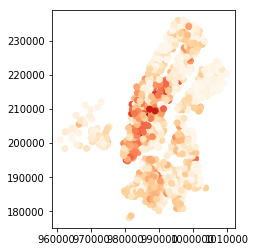

In [43]:
df.plot(column='availableBikes', cmap='OrRd')

### 3

In [45]:
merged = gp.sjoin(df, boros, how="inner", op='intersects')
merged

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,...,statusKey,statusValue,testStation,totalDocks,geometry,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
0,,11,22,,304,,2019-02-28 11:08:59 AM,40.704633,,-74.013617,...,1,In Service,False,33,POINT (980474.5127561709 195993.6964498408),3,1,Manhattan,358408.460709,6.364467e+08
1,,10,49,,359,,2019-02-28 11:09:23 AM,40.755103,,-73.974987,...,1,In Service,False,64,POINT (991179.9038325883 214381.943780388),3,1,Manhattan,358408.460709,6.364467e+08
2,,13,32,,377,,2019-02-28 11:09:37 AM,40.722438,,-74.005664,...,1,In Service,False,45,POINT (982679.8907825906 202480.2214391762),3,1,Manhattan,358408.460709,6.364467e+08
3,,10,25,,402,,2019-02-28 11:10:42 AM,40.740343,,-73.989551,...,1,In Service,False,39,POINT (987145.5291465931 209003.7784183958),3,1,Manhattan,358408.460709,6.364467e+08
4,,6,12,,3255,,2019-02-28 11:07:31 AM,40.750585,,-73.994685,...,1,In Service,False,19,POINT (985722.6805079071 212735.1920977242),3,1,Manhattan,358408.460709,6.364467e+08
5,,4,34,,3443,,2019-02-28 11:08:12 AM,40.761330,,-73.979820,...,1,In Service,False,41,POINT (989840.3759118057 216650.3564584734),3,1,Manhattan,358408.460709,6.364467e+08
6,,30,25,,72,,2019-02-28 11:07:07 AM,40.767272,,-73.993929,...,1,In Service,False,55,POINT (985931.7065028953 218814.7571059955),3,1,Manhattan,358408.460709,6.364467e+08
7,,31,1,,79,,2019-02-28 11:08:21 AM,40.719116,,-74.006667,...,1,In Service,False,33,POINT (982402.0068864139 201269.7703469796),3,1,Manhattan,358408.460709,6.364467e+08
8,,24,2,,82,,2019-02-28 11:08:22 AM,40.711174,,-74.000165,...,1,In Service,False,27,POINT (984204.1315763213 198376.4207269395),3,1,Manhattan,358408.460709,6.364467e+08
12,,24,3,,127,,2019-02-28 11:10:48 AM,40.731724,,-74.006744,...,1,In Service,False,31,POINT (982380.808170354 205863.5336667247),3,1,Manhattan,358408.460709,6.364467e+08


### 4

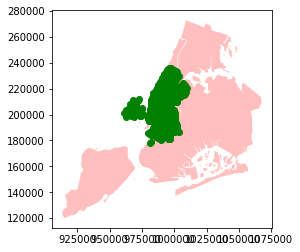

In [52]:
ax = boros.plot(color='red', alpha = 0.25);

df.plot(ax=ax, color='green');